In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Proccessed_Texas_Employment_ACS_2015_Texas.csv',header=0)
df.head()

,Unnamed: 0,ID,ST,PUMA,JWMNP,SCHL,WAGP,WKHP,WKW,ESR,...,JWAP,JWDP,SOCP,POWPUMA,POWSP,NWAB,NWAV,NWLA,NWLK,AGEP
0,0,1,48,1907,40.0,Post_Graduation,35000.0,50.0,1.0,1.0,...,Quarter_2,Quarter_2,General Services,Assigned POW,48.0,3.0,5.0,3.0,3.0,61
1,1,2,48,1907,0.0,School,0.0,0.0,0.0,6.0,...,Work_from_Home,Work_from_Home,Not a Worker,Not Worker or Under16,0.0,3.0,5.0,3.0,3.0,67
2,2,3,48,1907,0.0,School,0.0,0.0,0.0,6.0,...,Work_from_Home,Work_from_Home,Not a Worker,Not Worker or Under16,0.0,3.0,5.0,3.0,3.0,80
3,3,4,48,5202,0.0,No_Schooling,70000.0,40.0,1.0,1.0,...,Work_from_Home,Work_from_Home,businnes_and_finance,Assigned POW,48.0,3.0,5.0,3.0,3.0,33
4,4,5,48,5202,60.0,HighSchool,65000.0,55.0,1.0,1.0,...,Quarter_1,Quarter_1,General Services,Assigned POW,48.0,3.0,5.0,3.0,3.0,39


In [3]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194483 entries, 0 to 194482
Data columns (total 22 columns):
Unnamed: 0    194483 non-null int64
ID            194483 non-null int64
ST            194483 non-null int64
PUMA          194483 non-null int64
JWMNP         194483 non-null float64
SCHL          194483 non-null object
WAGP          194483 non-null float64
WKHP          194483 non-null float64
WKW           194483 non-null float64
ESR           194483 non-null float64
FOD1P         194483 non-null object
NAICSP        194483 non-null object
JWAP          194483 non-null object
JWDP          194483 non-null object
SOCP          194483 non-null object
POWPUMA       194483 non-null object
POWSP         194483 non-null float64
NWAB          194483 non-null float64
NWAV          194483 non-null float64
NWLA          194483 non-null float64
NWLK          194483 non-null float64
AGEP          194483 non-null int64
dtypes: float64(10), int64(5), object(7)
memory usage: 32.6+ MB


In [5]:
# To convert categorial variable to numeric
# Using dummy variable
# Number of dummy variables = Number of category - 1
# Dummies a pandas method
# drop_first to have number of categorical variable - 1
df=pd.get_dummies(df,drop_first=True)
df.head()

,Unnamed: 0,ID,ST,PUMA,JWMNP,WAGP,WKHP,WKW,ESR,POWSP,...,JWDP_Quarter_4,JWDP_Work_from_Home,SOCP_General Services,SOCP_Medical,SOCP_Militay and Law Enforcement,SOCP_Not a Worker,SOCP_Technical,SOCP_businnes_and_finance,POWPUMA_Not Work in USA or Puerto,POWPUMA_Not Worker or Under16
0,0,1,48,1907,40.0,35000.0,50.0,1.0,1.0,48.0,...,0,0,1,0,0,0,0,0,0,0
1,1,2,48,1907,0.0,0.0,0.0,0.0,6.0,0.0,...,0,1,0,0,0,1,0,0,0,1
2,2,3,48,1907,0.0,0.0,0.0,0.0,6.0,0.0,...,0,1,0,0,0,1,0,0,0,1
3,3,4,48,5202,0.0,70000.0,40.0,1.0,1.0,48.0,...,0,1,0,0,0,0,0,1,0,0
4,4,5,48,5202,60.0,65000.0,55.0,1.0,1.0,48.0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
# for splitting data 
X=df.loc[:,df.columns!='WAGP']
y=df['WAGP']
from sklearn.model_selection import train_test_split 
# If randam_state is constant we get the same split every time
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression(fit_intercept=True,normalize=True)
linear_reg.fit(X_train,y_train)
y_train_pred=linear_reg.predict(X_train)
y_test_pred=linear_reg.predict(X_test)
# Model Performance
from sklearn.metrics import mean_squared_error,r2_score
print('Train RMSE - ',(mean_squared_error(y_train,y_train_pred))**0.5) 
print('Test RMSE - ',(mean_squared_error(y_test,y_test_pred))**0.5) 
print('R2 Train - ',r2_score(y_train,y_train_pred)) # Goodness of fit 0 to 1
print('R2 Test - ',r2_score(y_test,y_test_pred))

Train RMSE -  42790.509442799244
Test RMSE -  42850.53265537459
R2 Train -  0.3712268668591635
R2 Test -  0.3671514629933925


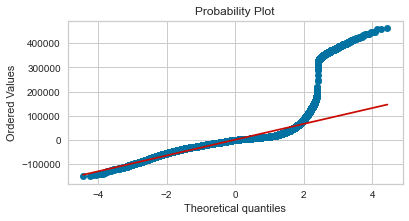

In [20]:
# Checking Assumptions
# Test for Normality
import scipy as sp
import matplotlib.pyplot as plt
residual = y_train - y_train_pred
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___,r) = sp.stats.probplot(residual.ravel(), plot=ax, fit=True)
plt.show()

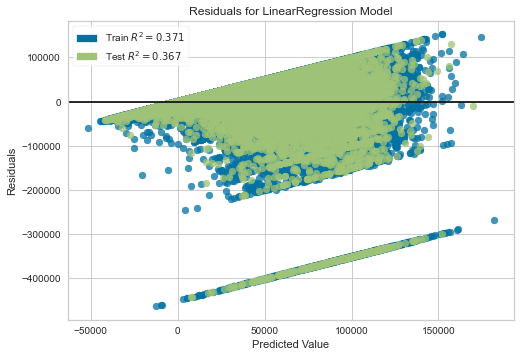

In [21]:
# Test for Rediuals 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(linear_reg, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

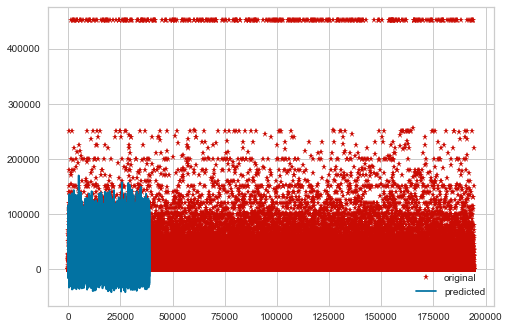

In [24]:
# Plot Model
import matplotlib.pyplot as plt
plt.plot(y_test,'r*',label="original")
plt.plot(y_test_pred, label="predicted")
plt.legend()
plt.show()